# Preliminary operations

In [42]:
# import main libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

In [43]:

# mont Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# import training data
df_data_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_train = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TRAIN_no_outliers.xlsx", index_col="Unnamed: 0")

# get training values
X_train = df_data_train.values
y_train = df_info_train['emotion']

# import test data
df_data_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_TEST_no_outliers.xlsx", index_col="Unnamed: 0")
df_info_test = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Outliers/DATASET NO OUTLIERS/df_prep_info_TEST_no_outliers.xlsx", index_col="Unnamed: 0")

# get test values
X_test = df_data_test.values
y_test = df_info_test['emotion']

In [45]:
# get training values
X_train_speech = df_data_train[df_info_train["vocal_channel"] == "speech"].values
y_train_speech = df_info_train.loc[df_info_train["vocal_channel"] == "speech", "emotion"].values

# get training values
X_train_song = df_data_train[df_info_train["vocal_channel"] == "song"].values
y_train_song = df_info_train.loc[df_info_train["vocal_channel"] == "song", "emotion"].values

In [46]:
#print(len(df_info_train))

#rows2remove = np.random.choice(df_info_train.index, len(df_info_train)//2, replace=False)

#print(len(rows2remove))
#rows2remove

In [47]:
rows2remove = [ 306, 1695,  124,  922,  295,  797, 1306,  716,  629, 1688, 1410,
        827, 1255, 1351,   19,  244,  433, 1216,  837, 1180,   16,  958,
        715,  774,   38,  236,  324, 1272, 1579,  161,  591,  143,  785,
         96,  758,  734, 1107,  285,  896, 1730,  262, 1441,  947, 1079,
        395, 1136,  208, 1596,  308, 1583, 1631,   23, 1168, 1103,  406,
       1584,  609,  299,  724,  286,  929,  238,  885,  139, 1581,  983,
       1651,   51,  857,  142,  269, 1169, 1554,  494,  873, 1187, 1662,
        985,  655,  123, 1303,  832, 1256, 1033, 1209, 1404,  846,  474,
       1552, 1577,  174,  332,  312, 1170,  496,  965, 1150,  137, 1001,
       1328, 1024, 1634,   50, 1563, 1406,  557, 1500, 1260,  735, 1536,
        913,  518,  505,  282, 1081,  628,  277,  541,  388,  509, 1304,
       1175,  757,  798, 1570, 1178, 1571,  215, 1616,  742, 1523, 1337,
        386,  855,  187,  843,   18, 1156,  915, 1293,  507, 1433,  348,
       1359, 1123,  813,  171,  830,  297,  754,  611,   39,  185, 1003,
        439,   14, 1664,  809,  704,  479,  428,  125,  666,  199, 1508,
        844,  824,   74,  585,  103,   93,   56,  300, 1343, 1611,  893,
        553,  575, 1428,  195,  930, 1211,   79, 1297, 1602,  391, 1764,
        994,  477,  112, 1076,  919,  159,  838, 1058,  828, 1380, 1407,
       1593,  568,  773,  317,  555, 1284,  232,  687,  589, 1034, 1678,
        658,   47,  803,  584,  472, 1629,  121, 1741,   65,  875,  166,
       1727,  134,  886, 1265, 1693, 1598,   68,    6,  540, 1102, 1468,
         86,   89,  749,  535, 1751, 1066,  747, 1305, 1550, 1546, 1748,
        887,  314,  806,  146,  267,  616,  847,   55,  599, 1724, 1402,
       1294, 1032,  577,  385,  106, 1436,  482,  995,  745, 1624,  283,
        248,  870, 1418, 1609,  399,  331, 1733,  515,  292,  417,  644,
        404,  622,  544, 1566, 1711, 1753, 1572,  480, 1247, 1770,  437,
        512,  105,  117, 1512,  260,  775,  361, 1373, 1356,   71,  133,
        485,  790,  712,  783, 1292, 1628, 1387, 1237,  943, 1316, 1762,
       1612, 1248,  736,  938, 1128,  777,  158,  258,  547,  964, 1220,
       1131, 1108, 1605,  845,  129, 1746,  818, 1575,   53,  310,  110,
        461, 1685, 1309, 1133, 1434, 1167,   57, 1511, 1266,  116,  596,
       1400,  502,  529,  233,   67,  131,  946,  689,  165,  202,  389,
         32,  865,  898,  264,  252,  881, 1228, 1601, 1087,  833, 1269,
       1195,  274,  320, 1395, 1382, 1207, 1335,  200, 1152,    0,  890,
       1179,  407, 1773,  825, 1332, 1532, 1442,  231,  612,  954, 1250,
        909, 1017,  661, 1157, 1194,  743, 1048,  950,  709,  149,  164,
         80, 1233,   37, 1639, 1028,  968,  290, 1443, 1006, 1295, 1390,
        305, 1480, 1064,  942,  268, 1504,  438,  128,  266,  460, 1190,
        594, 1098, 1573,   36,  115,  755, 1603,  224, 1417, 1147,  152,
       1285,  717, 1110, 1490, 1113, 1668,  928, 1126,  649, 1142,  405,
        493, 1510,  230, 1703,  349,  101, 1652,  276,  402, 1464,  760,
        296, 1176, 1738,  784,  465, 1330, 1757,  487, 1346,  720,  588,
       1506,   48,  119,  669,  564,  708,  226,  207,  425, 1318, 1012,
       1525,  318,  554, 1090,  607,  684, 1042, 1172, 1280, 1005, 1138,
       1357,  280, 1731,  700, 1486, 1706,  807, 1474,   73,  549,  866,
        464, 1320, 1431,  981,  431,  910,  436, 1268, 1344, 1421,  653,
        440,  905,    9,  816,  791,  223,  475,    1,  904,  469, 1772,
        273,  626, 1754,  867, 1429, 1725, 1184,  647,  772,   41,  971,
       1654,  503,  975,  889,  321,  190,  926, 1174,  225,  680, 1239,
        560, 1182,  251, 1561,  741, 1492, 1393,   44, 1011,  374, 1430,
       1173,  876, 1369, 1000, 1425, 1105,  639,  281, 1438, 1432,  478,
       1638, 1565, 1289, 1057,  536,  859,  393,  556,  432,  218, 1647,
       1101, 1070,  492,  463,  892,  122, 1342, 1254,  504, 1413,  138,
        695, 1621, 1391, 1023, 1580,   66, 1521, 1047, 1671,  795,   75,
       1578, 1755, 1229,  688,  630,  640, 1035,  765,  229, 1610,  850,
        242, 1010,  154, 1543,  562,  245, 1112, 1719,  590, 1165, 1460,
        313, 1339, 1388,  382,  140, 1002,  390,  831, 1649, 1275,  175,
       1595,   24, 1457, 1096,  701,  346, 1472, 1714, 1728,   42, 1736,
        730, 1454,  204,   13,  150, 1408,  970,  188, 1324,  739,  788,
        239, 1037,  637,  623, 1555, 1767,  367,  723, 1307,  532, 1670,
       1219, 1104,  377,  368,  355,  711,  697,  415,  576, 1050,  668,
        189, 1347,  884, 1750, 1591, 1440,  650,  357,  908,  963,  578,
       1137,  378, 1401,  337, 1665,  698,   85,  168,  241, 1765,  812,
        620,  624,  973,  581,  652,  665, 1286,  842,  350, 1258, 1723,
        325,  104, 1204, 1517, 1127,   77, 1018,  992,  342, 1109, 1210,
        672, 1279,  625,  176,  484,  307,  744,  413,  862, 1676, 1236,
       1077,  839, 1163,   84, 1456,  690, 1498, 1702, 1426, 1560, 1414,
        941, 1520, 1466, 1111,  787, 1162, 1099,   54, 1368,  869, 1267,
       1094,   95, 1203,  621,  566,  212, 1477, 1643,  685, 1334,  434,
       1227,  422,  423,  642, 1590,   99,  449, 1569, 1667,  879, 1515,
       1308, 1462, 1734,  582, 1191, 1375,  246,  691, 1587,  315,  359,
        213,  523,  811,  895,  633, 1188,  491, 1635,   43,  752, 1744,
       1502,  454, 1478,  210,  733, 1119,  160, 1424,  380,  722,  486,
        917, 1620,  148,  221,  900,  940,  897,  235,  113,  211, 1717,
        214,  984,  674, 1302,  272, 1080,  470, 1148, 1659,  362,  483,
       1640,  746,  453,  354, 1100,  254, 1213, 1198,  725, 1501,   90,
       1630,  769,  713,   10, 1338, 1729,  519, 1040, 1385,  182,  817,
       1063, 1534, 1073,   94,  598, 1092,  732,   20, 1707,  782,   97,
        430, 1143, 1594, 1071,  618, 1377,  278, 1518,  353,  467, 1559,
        525,  304,  114, 1242, 1221, 1144,  384, 1558, 1139, 1166,  671,
        645, 1124, 1467, 1409, 1217,  473, 1704, 1735, 1004]

# get new training dataset
df2_data_train = df_data_train.drop(index=rows2remove, axis=0)
df2_info_train = df_info_train.drop(index=rows2remove, axis=0)

# get training values
X_train_50 = df2_data_train.values
y_train_50 = df2_info_train['emotion']

#Multilayer Perceptron

## Hyperparameter tuning

In [9]:
# get LinearSVC
clf = MLPClassifier(
    random_state=0,
)

# defining parameter range
param_grid = {
    "hidden_layer_sizes" : [(32,), (32, 32,), (64,), (64, 64,), (128,)],
    "activation": ["logistic", "tanh", "relu"],
    "learning_rate": ["adaptive", "constant"],
    "solver": ["sgd", "adam"]
}

RSKF = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=0
)

grid = RandomizedSearchCV(
    clf,
    n_iter=75,
    param_distributions = param_grid,
    cv=RSKF,
    n_jobs = -1,
    refit = True,
    verbose=2,
    random_state=0
)

# fitting the model for grid search
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 60 is smaller than n_iter=75. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 60 candidates, totalling 600 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
                   estimator=MLPClassifier(random_state=0), n_iter=75,
                   n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'hidden_layer_sizes': [(32,), (32, 32),
                                                               (64,), (64, 64),
                                                               (128,)],
                                        'learning_rate': ['adaptive',
                                                          'constant'],
                                        'solver': ['sgd', 'adam']},
                   random_state=0, verbose=2)

In [10]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
print(grid.best_score_)

{'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (128,), 'activation': 'relu'}
MLPClassifier(hidden_layer_sizes=(128,), learning_rate='adaptive',
              random_state=0)
0.5494762902304323


In [6]:
grid_scores = pd.DataFrame(grid.cv_results_)
grid_scores

NameError: ignored

In [7]:
grid_scores.to_excel("tuning_scores_MLP.xlsx")

NameError: ignored

In [13]:
plt.plot(.loss_curve_)
plt.show()

SyntaxError: ignored

###Model Behavior

In [8]:
grid_scores = pd.read_excel("drive/MyDrive/Progetto Data Mining 2/CODICE PROGETTO/Classification/Tuning data/tuning_scores_MLP.xlsx", index_col="Unnamed: 0")

In [9]:
grid_scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_learning_rate,param_hidden_layer_sizes,param_activation,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.214909,0.580571,0.002250,0.000360,sgd,adaptive,"(32,)",logistic,"{'solver': 'sgd', 'learning_rate': 'adaptive',...",0.370787,...,0.398876,0.359551,0.342697,0.387640,0.342697,0.384181,0.344633,0.367825,0.024972,55
1,2.119725,0.270745,0.002225,0.000318,adam,adaptive,"(32,)",logistic,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.550562,...,0.528090,0.516854,0.522472,0.511236,0.584270,0.485876,0.525424,0.526411,0.029450,13
2,2.271130,0.568038,0.002077,0.000376,sgd,constant,"(32,)",logistic,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.370787,...,0.398876,0.359551,0.342697,0.387640,0.342697,0.384181,0.344633,0.367825,0.024972,55
3,2.409415,0.542687,0.002735,0.001802,adam,constant,"(32,)",logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.550562,...,0.528090,0.516854,0.522472,0.511236,0.584270,0.485876,0.525424,0.526411,0.029450,13
4,1.284787,0.100928,0.002295,0.000241,sgd,adaptive,"(32, 32)",logistic,"{'solver': 'sgd', 'learning_rate': 'adaptive',...",0.207865,...,0.191011,0.179775,0.191011,0.162921,0.191011,0.192090,0.175141,0.183352,0.022781,59
5,3.139886,0.522730,0.002222,0.000210,adam,adaptive,"(32, 32)",logistic,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.528090,...,0.533708,0.449438,0.511236,0.539326,0.561798,0.446328,0.457627,0.504440,0.039841,29
6,0.968531,0.192496,0.005750,0.003485,sgd,constant,"(32, 32)",logistic,"{'solver': 'sgd', 'learning_rate': 'constant',...",0.207865,...,0.185393,0.168539,0.191011,0.157303,0.191011,0.175141,0.180791,0.181099,0.019065,60
7,3.210608,0.845467,0.002922,0.002123,adam,constant,"(32, 32)",logistic,"{'solver': 'adam', 'learning_rate': 'constant'...",0.528090,...,0.533708,0.449438,0.511236,0.539326,0.561798,0.446328,0.457627,0.504440,0.039841,29
8,3.031827,1.013983,0.002543,0.000436,sgd,adaptive,"(64,)",logistic,"{'solver': 'sgd', 'learning_rate': 'adaptive',...",0.382022,...,0.376404,0.421348,0.382022,0.398876,0.398876,0.435028,0.361582,0.401571,0.029631,53
9,3.063651,0.680416,0.002374,0.000372,adam,adaptive,"(64,)",logistic,"{'solver': 'adam', 'learning_rate': 'adaptive'...",0.550562,...,0.561798,0.516854,0.533708,0.550562,0.589888,0.502825,0.502825,0.535958,0.027513,5


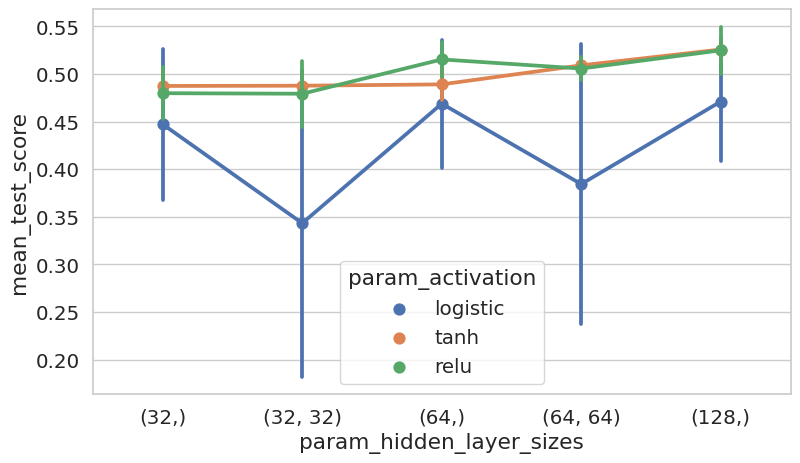

In [16]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.pointplot(
    data=grid_scores,
    x="param_hidden_layer_sizes",
    y="mean_test_score",
    hue="param_activation",
    order=['(32,)', '(32, 32)', '(64,)', '(64, 64)', '(128,)']
)

plt.savefig("mlp-params_1.pdf")

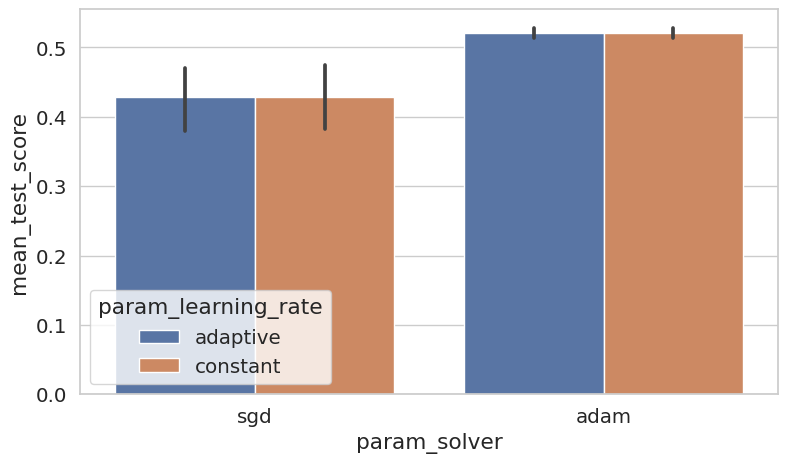

In [17]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.barplot(
    data=grid_scores,
    x="param_solver",
    y="mean_test_score",
    hue="param_learning_rate"
    #order=['(32,)', '(32, 32)', '(64,)', '(64, 64)', '(128,)']
)

plt.savefig("mlp-params_2.pdf")

####Feature Importances

In [ ]:
clf = MLPClassifier(
    activation='relu',
    alpha=1,
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    max_iter=1000
)

In [ ]:
feat_imp = abs(clf.feature_importances_)

df_feat_imp = pd.DataFrame(feat_imp, index=df_data_train.columns, columns=["importance"])
df_feat_imp = df_feat_imp.sort_values("importance", ascending=False)
df_feat_imp

AttributeError: ignored

In [ ]:
sns.set(rc={'figure.figsize':(9, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.barplot(
    data =df_feat_imp[:10],
    x="importance",
    y=df_feat_imp.index[:10],
    orient='h',
    )

plt.savefig("Random-Forest_features.svg")

##Classification

In [51]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [52]:
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

# scikit-plot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_cumulative_gain, plot_lift_curve
import matplotlib.pyplot as plt

### All

In [53]:
# get LinearSVC
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    max_iter = 500
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.4485049833887043
              precision    recall  f1-score   support

       angry       0.45      0.69      0.55        94
        calm       0.49      0.52      0.50        91
     disgust       0.44      0.42      0.43        48
     fearful       0.50      0.36      0.42        92
       happy       0.36      0.27      0.31        93
     neutral       0.53      0.37      0.44        46
         sad       0.39      0.41      0.40        94
   surprised       0.49      0.55      0.52        44

    accuracy                           0.45       602
   macro avg       0.46      0.45      0.44       602
weighted avg       0.45      0.45      0.44       602

ROC-AUC:  0.8331229264873625


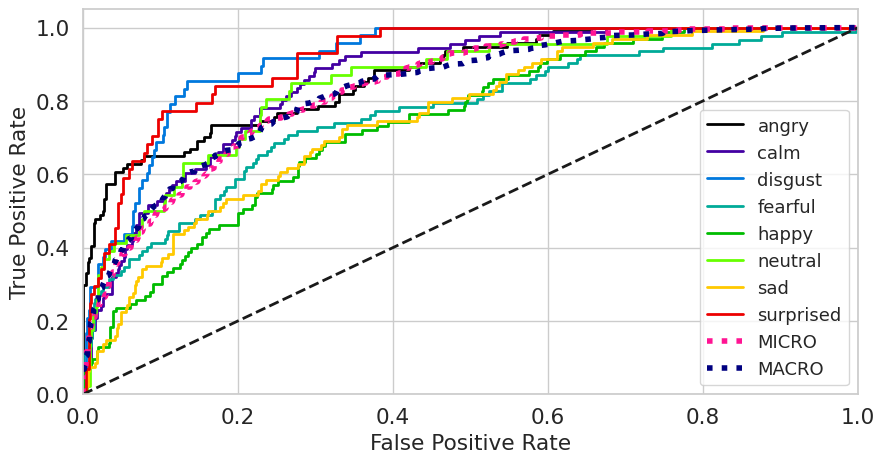

In [54]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test,
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLP_ROC.pdf", format="pdf")

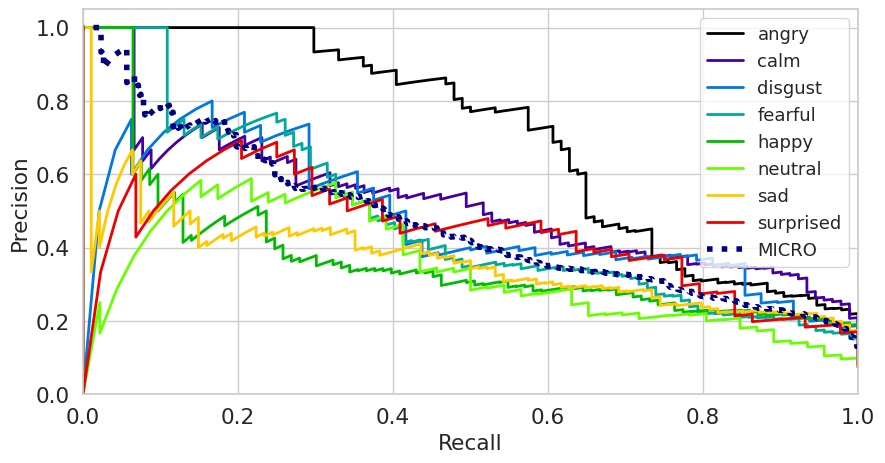

In [55]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test,
    clf.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLP_Precision_Recall.pdf", format="pdf")

####Early stop

In [56]:
# get LinearSVC
clf_es = MLPClassifier(
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    early_stopping=True
)

clf_es.fit(X_train, y_train)

y_pred = clf_es.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, clf_es.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.4601328903654485
              precision    recall  f1-score   support

       angry       0.49      0.71      0.58        94
        calm       0.49      0.56      0.52        91
     disgust       0.47      0.56      0.51        48
     fearful       0.52      0.37      0.43        92
       happy       0.41      0.30      0.35        93
     neutral       0.46      0.28      0.35        46
         sad       0.36      0.37      0.36        94
   surprised       0.52      0.50      0.51        44

    accuracy                           0.46       602
   macro avg       0.46      0.46      0.45       602
weighted avg       0.46      0.46      0.45       602

ROC-AUC:  0.841952514653649


In [57]:
len(clf_es.loss_curve_)

94

<Axes: >

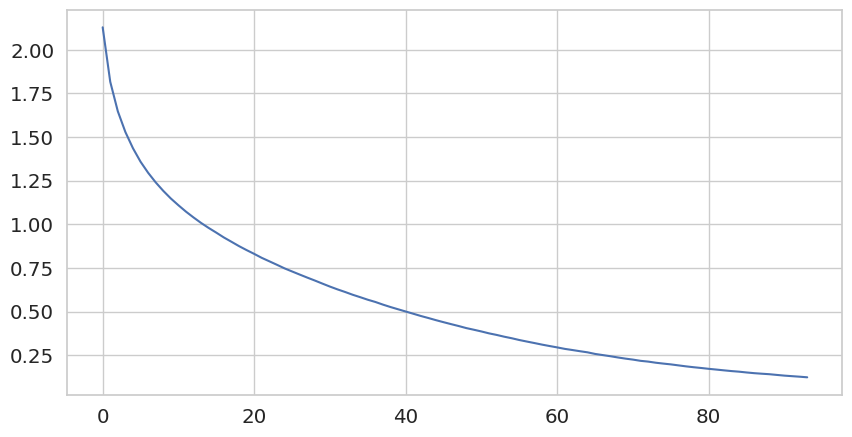

In [58]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

sns.lineplot(data=clf_es.loss_curve_)

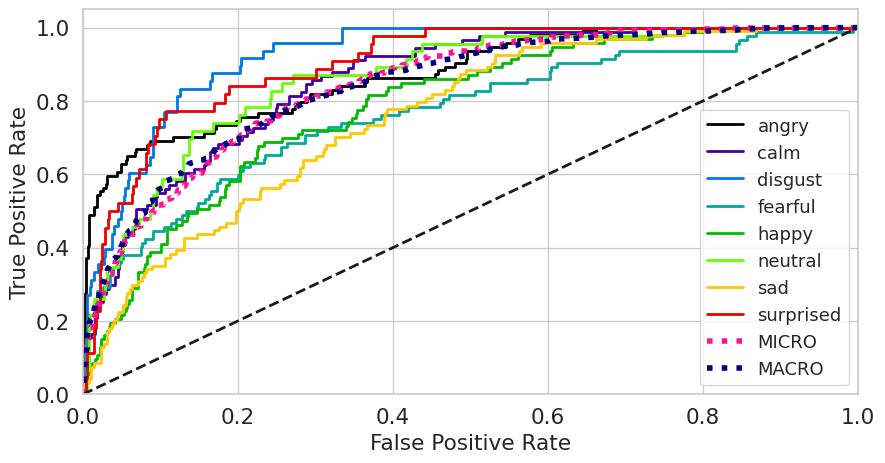

In [59]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_roc(
    y_test,
    clf_es.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLPes_ROC.pdf", format="pdf")

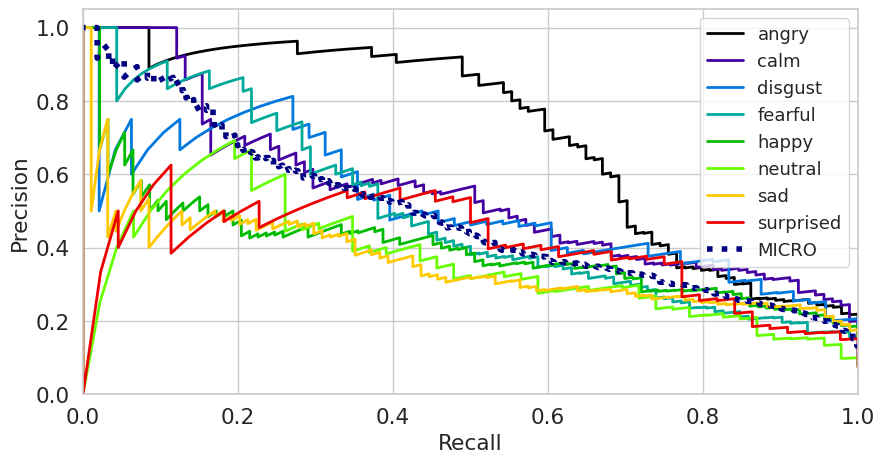

In [60]:
sns.set(rc={'figure.figsize':(10, 5)})
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

plot_precision_recall(
    y_test,
    clf_es.predict_proba(X_test),
    title=None
)

plt.legend(fontsize=13, labels=["angry","calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised", "MICRO", "MACRO"])
plt.savefig("MLPes_Precision_Recall.pdf", format="pdf")

### All (50%)

In [61]:
# get LinearSVC
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    max_iter = 500,
    early_stopping=True
)

clf.fit(X_train_50, y_train_50)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.38870431893687707
              precision    recall  f1-score   support

       angry       0.43      0.73      0.54        94
        calm       0.45      0.58      0.51        91
     disgust       0.43      0.46      0.44        48
     fearful       0.44      0.30      0.36        92
       happy       0.28      0.20      0.24        93
     neutral       0.23      0.15      0.18        46
         sad       0.28      0.21      0.24        94
   surprised       0.40      0.36      0.38        44

    accuracy                           0.39       602
   macro avg       0.37      0.38      0.36       602
weighted avg       0.37      0.39      0.37       602

ROC-AUC:  0.7753731029261535


### Just Speech

In [62]:
# get LinearSVC
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    max_iter = 500,
    early_stopping=True
)

clf.fit(X_train_speech, y_train_speech)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
#print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("ROC-AUC: ", roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))

Accuracy 0.36046511627906974
              precision    recall  f1-score   support

       angry       0.42      0.56      0.48        94
        calm       0.42      0.46      0.44        91
     disgust       0.33      0.60      0.43        48
     fearful       0.39      0.22      0.28        92
       happy       0.26      0.33      0.29        93
     neutral       0.40      0.04      0.08        46
         sad       0.31      0.22      0.26        94
   surprised       0.43      0.43      0.43        44

    accuracy                           0.36       602
   macro avg       0.37      0.36      0.34       602
weighted avg       0.37      0.36      0.34       602

ROC-AUC:  0.7875944799089193


### Just Song

In [112]:
# get LinearSVC
clf = MLPClassifier(
    hidden_layer_sizes=(128,),
    learning_rate='adaptive',
    random_state=0,
    max_iter = 500,
    early_stopping=True
)

clf.fit(X_train_song, y_train_song)

y_pred = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, labels=np.unique(y_pred)))
print("ROC-AUC: ", roc_auc_score(
    y_test.loc[y_test.isin(np.unique(y_pred))],
    y_pred_prob,
    multi_class='ovr'
    )
)

Accuracy 0.3521594684385382
              precision    recall  f1-score   support

       angry       0.37      0.79      0.50        94
        calm       0.50      0.35      0.41        91
     fearful       0.24      0.30      0.27        92
       happy       0.34      0.31      0.32        93
     neutral       0.35      0.35      0.35        46
         sad       0.39      0.35      0.37        94

   micro avg       0.35      0.42      0.38       510
   macro avg       0.36      0.41      0.37       510
weighted avg       0.36      0.42      0.37       510



ValueError: ignored

In [115]:
y_pred_prob

array([[3.51466539e-02, 9.60980671e-02, 1.52341484e-01, 1.41987210e-01,
        1.46373153e-01, 4.28053432e-01],
       [4.05168108e-02, 1.03052798e-01, 1.05510658e-01, 6.33125215e-02,
        5.53167439e-01, 1.34439772e-01],
       [3.34516742e-02, 6.39440352e-02, 2.94500411e-01, 2.02978745e-01,
        1.23962862e-01, 2.81162272e-01],
       ...,
       [2.66212098e-01, 4.89728148e-05, 7.25715879e-01, 7.89392216e-03,
        5.10073113e-05, 7.81203718e-05],
       [1.87301890e-01, 1.38868855e-04, 7.99791210e-01, 1.15754454e-02,
        1.41621459e-04, 1.05096441e-03],
       [9.68938085e-01, 4.18576486e-05, 1.94014481e-02, 1.04963525e-02,
        4.25152300e-05, 1.07974189e-03]])

In [110]:
y_test.loc[y_test.isin(np.unique(y_pred))].reset_index()

,index,emotion
0,0,neutral
1,1,neutral
2,2,neutral
3,3,neutral
4,4,calm
...,...,...
505,597,fearful
506,598,fearful
507,599,fearful
508,600,fearful
